In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv("diabetes_v3.csv")
dataset.head()

,id,preg,glu,bp,st,ins,bmi,pedf,age,target
0,0,NaN,148.0,72.0,35.0,0.0,33.6,NaN,50.0,1
1,1,1.0,NaN,66.0,29.0,0.0,26.6,0.351,31.0,0
2,2,8.0,183.0,64.0,0.0,0.0,23.3,NaN,32.0,1
3,3,1.0,89.0,66.0,23.0,94.0,NaN,0.167,21.0,0
4,4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      768 non-null    int64  
 1   preg    686 non-null    float64
 2   glu     694 non-null    float64
 3   bp      682 non-null    float64
 4   st      684 non-null    float64
 5   ins     682 non-null    float64
 6   bmi     688 non-null    float64
 7   pedf    688 non-null    float64
 8   age     698 non-null    float64
 9   target  768 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [4]:
dataset.describe()

,id,preg,glu,bp,st,ins,bmi,pedf,age,target
count,768.000000,686.000000,694.000000,682.000000,684.000000,682.000000,688.000000,688.000000,698.000000,768.000000
mean,383.500000,3.782799,121.210375,69.173021,20.640351,80.689150,31.955814,0.468795,33.342407,0.348958
std,221.846794,3.307730,32.364387,19.332685,15.982949,116.719376,7.785208,0.331887,11.845924,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.750000,1.000000,99.000000,62.500000,0.000000,0.000000,27.300000,0.240750,24.000000,0.000000
50%,383.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.368000,29.000000,0.000000
75%,575.250000,6.000000,141.000000,80.000000,32.250000,130.000000,36.600000,0.612500,41.000000,1.000000
max,767.000000,15.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
dataset.isnull()

,id,preg,glu,bp,st,ins,bmi,pedf,age,target
0,False,True,False,False,False,False,False,True,False,False
1,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,True,False,False,False
4,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
763,False,False,True,False,True,True,False,False,False,False
764,False,False,False,False,False,False,True,False,False,False
765,False,False,False,False,True,False,False,False,False,False
766,False,False,False,True,False,False,False,True,True,False


In [6]:
dataset.isnull().sum()

id         0
preg      82
glu       74
bp        86
st        84
ins       86
bmi       80
pedf      80
age       70
target     0
dtype: int64

In [7]:
dataset.fillna(dataset.mean(), inplace=True)
dataset.isnull().sum()


id        0
preg      0
glu       0
bp        0
st        0
ins       0
bmi       0
pedf      0
age       0
target    0
dtype: int64

In [8]:
X = dataset.drop(columns='target', axis=1)
X = X.drop(columns='id', axis=1)
X

,preg,glu,bp,st,ins,bmi,pedf,age
0,3.782799,148.000000,72.000000,35.000000,0.00000,33.600000,0.468795,50.000000
1,1.000000,121.210375,66.000000,29.000000,0.00000,26.600000,0.351000,31.000000
2,8.000000,183.000000,64.000000,0.000000,0.00000,23.300000,0.468795,32.000000
3,1.000000,89.000000,66.000000,23.000000,94.00000,31.955814,0.167000,21.000000
4,3.782799,137.000000,40.000000,35.000000,168.00000,43.100000,2.288000,33.000000
...,...,...,...,...,...,...,...,...
763,10.000000,121.210375,76.000000,20.640351,80.68915,32.900000,0.171000,63.000000
764,2.000000,122.000000,70.000000,27.000000,0.00000,31.955814,0.340000,27.000000
765,5.000000,121.000000,72.000000,20.640351,112.00000,26.200000,0.245000,30.000000
766,1.000000,126.000000,69.173021,0.000000,0.00000,30.100000,0.468795,33.342407


In [9]:
y = dataset['target']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: target, Length: 768, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train

array([[-0.54889868, -1.20704108, -3.95659918, ..., -4.39420046,
        -0.51646941, -1.0873743 ],
       [ 0.03028415, -0.29536361,  0.72658454, ..., -0.51030116,
         2.52781673,  1.5251478 ],
       [-0.87377148,  0.58375396, -0.00598987, ..., -0.4414377 ,
         0.57299905, -0.99728733],
       ...,
       [ 2.05008365, -0.65352261,  0.95503253, ...,  1.88614735,
         2.07335274,  0.44410417],
       [-1.19864427,  0.64887377, -3.95659918, ...,  1.44542118,
        -0.82463334, -0.36667855],
       [-1.19864427,  0.12791522, -0.00598987, ..., -1.29534464,
        -0.64720562, -1.0873743 ]])

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [13]:

from sklearn.metrics import accuracy_score

print("Accuracy is ", accuracy_score(y_test, y_pred))


Accuracy is  0.7402597402597403


In [14]:

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))


[[79 20]
 [20 35]]


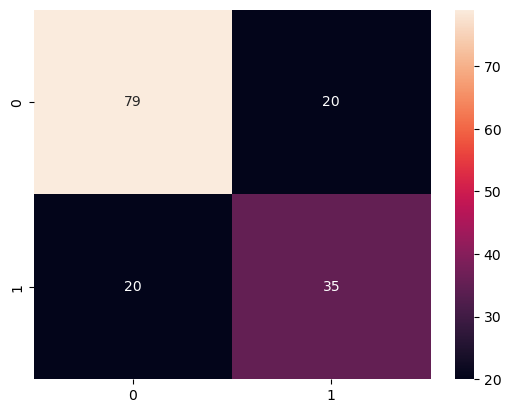

In [15]:
#show the confusion matrix in a better way
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

plt.show()